In [1]:
#we need to connect to a GUI event loop. This tells IPython where (and how) to display plots.
%matplotlib inline
import numpy as np
import cv2

Parameters:	
filename – Name of file to be loaded.
flags –
Flags specifying the color type of a loaded image:

    CV_LOAD_IMAGE_ANYDEPTH - If set, return 16-bit/32-bit image when the input has the corresponding depth, otherwise convert it to 8-bit.
    CV_LOAD_IMAGE_COLOR - If set, always convert image to the color one

    CV_LOAD_IMAGE_GRAYSCALE - If set, always convert image to the grayscale one

    0 Return a 3-channel color image.

    Note In the current implementation the alpha channel, if any, is stripped from the output image. Use negative value if you need the alpha channel.

    =0 Return a grayscale image.

    <0 Return the loaded image as is (with alpha channel).

In [2]:
# Load an color image in grayscale
img = cv2.imread('images/webimage1.jpg',0)


Second argument is a flag which specifies the way image should be read.

    cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
    cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
    cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel

In [3]:

#reading image
#First argument is a window name which is a string. second argument is our image.
#You can create as many windows as you wish, but with different window names.
cv2.imshow('image1',img)
cv2.waitKey(1)
# it will wait at least 1 ms,
# Its argument is the time in milliseconds. The function waits for specified milliseconds for any keyboard event.
# If you press any key in that time, the program continues. If 0 is passed, it waits indefinitely for a key stroke.
cv2.destroyAllWindows()
# cv2.destroyAllWindows() simply destroys all the windows we created. If you want to destroy 
# any specific window, use the function cv2.destroyWindow() where you pass the exact window name as the argument.

There is a special case where you can already create a window and load image to it later. In that case,
you can specify whether window is resizable or not. 
It is done with the function cv2.namedWindow(). 
By default, the flag is cv2.WINDOW_AUTOSIZE. But if you specify flag to be cv2.WINDOW_NORMAL,
you can resize window. It will be helpful when image is too large in dimension and adding track bar to windows.

In [4]:

cv2.namedWindow('image', cv2.WINDOW_NORMAL)
img = cv2.imread('images/image1.jpg')
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
#writing the image
#First argument is the file name, second argument is the image you want to save.

cv2.imwrite('images/writtenimage1.png',img)

True

In [6]:
#Below program loads an image in grayscale, displays it, save the image if you press ‘s’ and exit,
#or simply exit without saving if you press ESC key.

cv2.namedWindow('image2', cv2.WINDOW_NORMAL)
cv2.imshow('image2',img)
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('p'): # wait for 's' key to save and exit
    cv2.imwrite('images/writtenimage1.png',img)
    cv2.destroyAllWindows()
#ord function return an ascii value of character

# Using Matplotlib

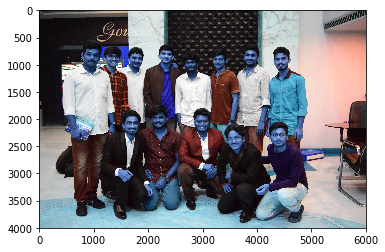

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('images/image1.jpg')
imgplot = plt.imshow(img)
plt.show()

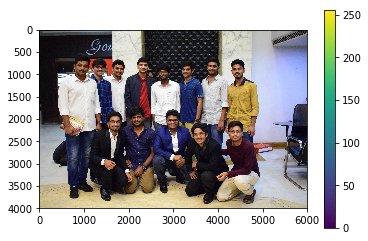

In [11]:
#%pylab inline
import matplotlib.image as mpimg
img=mpimg.imread('images/image1.jpg')
imgplot = plt.imshow(img)
plt.colorbar()

there is a lot of change in the image when we used opencv to read,plot with matplot and reading,plotting with matplot

Link to [image matplotlib and numpy it](image matplotlib and numpy it.ipynb)

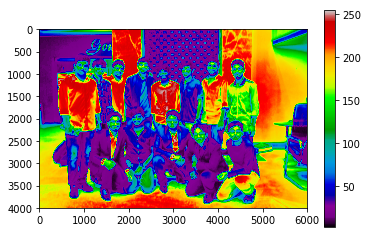

In [8]:
img = cv2.imread('images/image1.jpg',0)
imgplt = plt.imshow(img, cmap = 'nipy_spectral', interpolation = 'bicubic')
plt.colorbar()
#interpolation options
# [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
#            'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
#            'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
#see the image tutorial in the link in the above marked cell

In [16]:
len(img)

4000

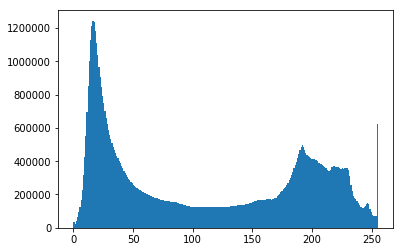

In [17]:
plt.hist(img.ravel(), bins=256)
plt.show()

Now moving to Videos

In [0]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
# argument can be either the device index or the name of a video file. 
# Device index is just the number to specify which camera. 
# Normally one camera will be connected (as in my case).
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('video1',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

cap.read() returns a bool (True/False). If frame is read correctly, it will be True. So you can check end of the video by checking this return value.

Sometimes, cap may not have initialized the capture. In that case, this code shows error. You can check whether it is initialized or not by the method cap.isOpened(). If it is True, OK. Otherwise open it using cap.open().

You can also access some of the features of this video using cap.get(propId) method where propId is a number from 0 to 18. Each number denotes a property of the video (if it is applicable to that video) and full details can be seen here: Property Identifier. Some of these values can be modified using cap.set(propId, value). Value is the new value you want.

For example, I can check the frame width and height by cap.get(3) and cap.get(4). It gives me 640x480 by default. But I want to modify it to 320x240. Just use ret = cap.set(3,320) and ret = cap.set(4,240).

https://docs.opencv.org/2.4/modules/highgui/doc/reading_and_writing_images_and_video.html#videocapture-get

In [2]:
import numpy as np
import cv2
#bit modified and efficient code with other options
cap = cv2.VideoCapture(0)
# argument can be either the device index or the name of a video file. 
# Device index is just the number to specify which camera. 
# Normally one camera will be connected (as in my case).
while(True):
    print(cap.isOpened())
    # Capture frame-by-frame,returns true or false
    ret, frame = cap.read()
    #checking whether it is opened correctly or not 
    if cap.isOpened():
        print("cap opened")
    else:
        print("Error in opening cap,opening")
        cap.open()
        
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print("video size : ",cap.get(3),"X",cap.get(4))
    # Display the resulting frame
    cv2.imshow('video1',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  64

video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True
cap opened
video size :  640.0 X 480.0
True

In [3]:
#Displaying a video
import numpy as np
import cv2

cap = cv2.VideoCapture('videos/opencvvideo1.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()
    if cap.isOpened():
        print("cap opened")
    else:
        print("Error in opening cap,opening")
        cap.open()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened
cap opened

use appropriate time for cv2.waitKey(). If it is too less, video will be very fast and if it is too high, video will be slow (Well, that is how you can display videos in slow motion). 25 milliseconds will be OK in normal cases.

Saving a Video
So we capture a video, process it frame-by-frame and we want to save that video. For images, it is very simple, just use cv2.imwrite(). Here a little more work is required.

This time we create a VideoWriter object. We should specify the output file name (eg: output.avi). Then we should specify the FourCC code (details in next paragraph). Then number of frames per second (fps) and frame size should be passed. And last one is isColor flag. If it is True, encoder expect color frame, otherwise it works with grayscale frame.

FourCC is a 4-byte code used to specify the video codec. The list of available codes can be found in fourcc.org. It is platform dependent. Following codecs works fine for me.

In Fedora: DIVX, XVID, MJPG, X264, WMV1, WMV2. (XVID is more preferable. MJPG results in high size video. X264 gives very small size video)
In Windows: DIVX (More to be tested and added)
In OSX : (I don’t have access to OSX. Can some one fill this?)
FourCC code is passed as cv2.VideoWriter_fourcc('M','J','P','G') or cv2.VideoWriter_fourcc(*'MJPG) for MJPG.

Below code capture from a Camera, flip every frame in vertical direction and saves it.
                                                                                           
                                                                                          
http://www.fourcc.org/codecs.php

In [7]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('videos/output1.mp4',fourcc, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        #frame = cv2.flip(frame,0)
        #above will filp the frame by 180 degrees
        # write the frame
        out.write(frame)

        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

# Drawing Functions in OpenCV

512


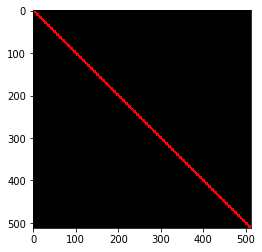

In [9]:
#### drawing a line
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Create a black image
img = np.zeros((512,512,3), np.uint8)
print(len(img))
# # Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)
imgplot = plt.imshow(img)
plt.show()


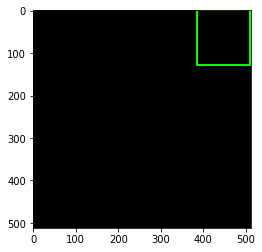

In [10]:
#drawing a rectangle
img = np.zeros((512,512,3), np.uint8)
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)
imgplot = plt.imshow(img)
plt.show()

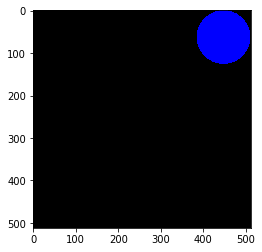

In [29]:
#drawing a circle
img = np.zeros((512,512,3), np.uint8)
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)
#for filling -1
imgplot = plt.imshow(img)
plt.show()

To draw the ellipse, we need to pass several arguments. One argument is the center location (x,y). Next argument is axes lengths (major axis length, minor axis length). angle is the angle of rotation of ellipse in anti-clockwise direction. startAngle and endAngle denotes the starting and ending of ellipse arc measured in clockwise direction from major axis.

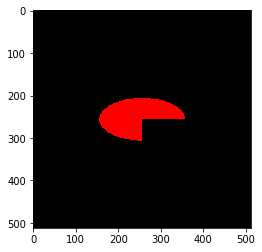

In [30]:
#drawing a ellipse
img = np.zeros((512,512,3), np.uint8)
img = cv2.ellipse(img,(256,256),(100,50),0,90,360,255,-1)
#img,center,orentation of major axis with x-axis,clock wise direction,end angle,thickness
#for filling -1
imgplot = plt.imshow(img)
plt.show()

[[ 10   5]
 [ 20  30]
 [ 70  20]
 [250  10]
 [200 200]] (5, 2)
[[[ 10   5]]

 [[ 20  30]]

 [[ 70  20]]

 [[250  10]]

 [[200 200]]] (5, 1, 2)
[array([[[ 10,   5]],

       [[ 20,  30]],

       [[ 70,  20]],

       [[250,  10]],

       [[200, 200]]])]


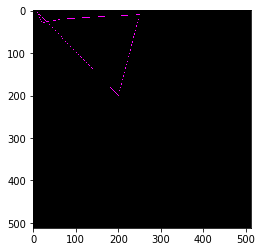

In [46]:
#drawing a polygon
img = np.zeros((512,512,3), np.uint8)
pts = np.array([[10,5],[20,30],[70,20],[250,10],[200,200]], np.int32)
print(pts,pts.shape)
pts = pts.reshape((-1,1,2))
print(pts,pts.shape)
print([pts])
img = cv2.polylines(img,[pts],True,(255,0,255))
imgplot = plt.imshow(img)
plt.show()

If third argument is False, you will get a polylines joining all the points, not a closed shape.
cv2.polylines() can be used to draw multiple lines. Just create a list of all the lines you want to draw and pass it to the function. All lines will be drawn individually. It is more better and faster way to draw a group of lines than calling cv2.line() for each line.

Adding Text to Images:

    To put texts in images, you need specify following things.
    Text data that you want to write
    Position coordinates of where you want put it (i.e. bottom-left corner where data starts).
    Font type (Check cv2.putText() docs for supported fonts)
    Font Scale (specifies the size of font)
    regular things like color, thickness, lineType etc. For better look, lineType = cv2.LINE_AA is recommended.

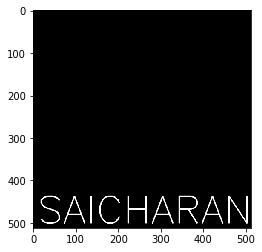

In [50]:
font = cv2.FONT_HERSHEY_SIMPLEX
img = np.zeros((512,512,3), np.uint8)
cv2.putText(img,'SAICHARAN',(10,500), font,3,(255,255,255),2,cv2.LINE_AA)
imgplot = plt.imshow(img)
plt.show()

Now we will learn how to handle mouse events in OpenCV

You will learn these functions : cv2.setMouseCallback()

In [51]:
dir(cv2)

In [53]:
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)
#this are the events for which the mousecallback will be responded

['EVENT_FLAG_ALTKEY', 'EVENT_FLAG_CTRLKEY', 'EVENT_FLAG_LBUTTON', 'EVENT_FLAG_MBUTTON', 'EVENT_FLAG_RBUTTON', 'EVENT_FLAG_SHIFTKEY', 'EVENT_LBUTTONDBLCLK', 'EVENT_LBUTTONDOWN', 'EVENT_LBUTTONUP', 'EVENT_MBUTTONDBLCLK', 'EVENT_MBUTTONDOWN', 'EVENT_MBUTTONUP', 'EVENT_MOUSEHWHEEL', 'EVENT_MOUSEMOVE', 'EVENT_MOUSEWHEEL', 'EVENT_RBUTTONDBLCLK', 'EVENT_RBUTTONDOWN', 'EVENT_RBUTTONUP']


In [56]:
#if left double clicked ----> circle
import cv2
import numpy as np

# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)

# Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    #waits for atleast 20ms and if esc is pressed then exits
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()

In [60]:
#more advanced than above
# In this, we draw either rectangles or circles (depending on the mode we select) by dragging
# the mouse like we do in Paint application. 
# So our mouse callback function has two parts, one to draw rectangle and other to draw the circles.
import cv2
import numpy as np

drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)
            
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):# for m
        mode = not mode
    elif k == 27:#for esc button
        break

cv2.destroyAllWindows()

# Trackbar as the Color Palette

Here we will create a simple application which shows the color you specify. You have a window which shows the color and three trackbars to specify each of B,G,R colors. You slide the trackbar and correspondingly window color changes. By default, initial color will be set to Black.

Learn to bind trackbar to OpenCV windows

You will learn these functions : cv2.getTrackbarPos(), cv2.createTrackbar() etc.

For cv2.getTrackbarPos() function, first argument is the trackbar name, second one is the window name to which it is attached, third argument is the default value, fourth one is the maximum value and fifth one is the callback function which is executed everytime trackbar value changes. The callback function always has a default argument which is the trackbar position. In our case, function does nothing, so we simply pass.

Another important application of trackbar is to use it as a button or switch. OpenCV, by default, doesn’t have button functionality. So you can use trackbar to get such functionality. In our application, we have created one switch in which application works only if switch is ON, otherwise screen is always black.

In [2]:
import cv2
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)

while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    s = cv2.getTrackbarPos(switch,'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]

cv2.destroyAllWindows()

In [7]:
img = np.zeros((300,512,3), np.uint8)
print(img)
img[:] = [255,0,0]
print(img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 ...

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255

# Basic Operations on Images

    Access pixel values and modify them
    Access image properties
    Setting Region of Image (ROI)
    Splitting and Merging images

OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. When you display an image loaded with OpenCv in matplotlib the channels will be back to front.

The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB, much like you do when creating the greyscale image.

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

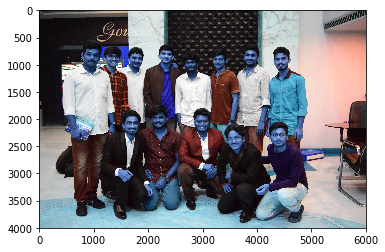

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = cv2.imread('images/image1.jpg')
imgplot1 = plt.imshow(img)
plt.show()


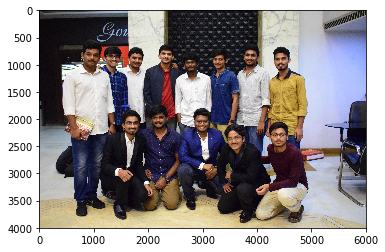

In [4]:
img = cv2.imread('images/image1.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgplot1 = plt.imshow(RGB_img)
plt.show()

You can access a pixel value by its row and column coordinates. For BGR image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned.

In [5]:
px = RGB_img[100,100]
print(px)
# accessing only blue pixel
red = RGB_img[100,100,0]
print(red)

[56 57 59]
56


In [6]:
RGB_img[100,100] = [255,255,255]
print(RGB_img[100,100])

[255 255 255]


Above mentioned method is normally used for selecting a region of array, say first 5 rows and last 3 columns like that. For individual pixel access, Numpy array methods, array.item() and array.itemset() is considered to be better. But it always returns a scalar. So if you want to access all B,G,R values, you need to call array.item() separately for all.

In [7]:
print(RGB_img.item(10,10,2))

# modifying RED value
RGB_img.itemset((10,10,2),100)
print(RGB_img.item(10,10,2))

34
100


In [8]:
#Accessing Image Properties
RGB_img.shape

(4000, 6000, 3)

If image is grayscale, tuple returned contains only number of rows and columns. So it is a good method to check if loaded image is grayscale or color image.

In [9]:


print(RGB_img.dtype)
print(RGB_img.size)
#308*450*3
ball = RGB_img[280:340, 330:390]
#as the  image size is 308 it has only 28 blocks in x and in y it has 60 blocks
#so 60*28*3
print(ball.shape)
print(ball.size)
print(ball.dtype)

uint8
72000000
(60, 60, 3)
10800
uint8


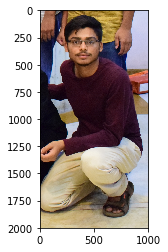

In [10]:
cut_img = RGB_img[2000:4000,4000:5000]
saicharan = plt.imshow(cut_img)
plt.show()

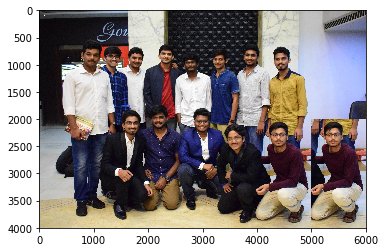

In [11]:
RGB_img[2000:4000,5000:6000] = cut_img
edited_img = plt.imshow(RGB_img)
plt.show()
cv2.imshow("edited",RGB_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Splitting and Merging Image Channels
The B,G,R channels of an image can be split into their individual planes when needed. Then, the individual channels can be merged back together to form a BGR image again. This can be performed by:

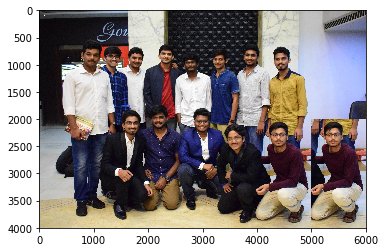

In [12]:
b,g,r = cv2.split(RGB_img)
img = cv2.merge((b,g,r))
edited_img = plt.imshow(img)
plt.show()

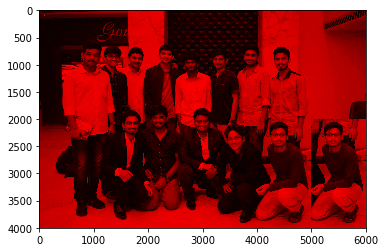

In [16]:
b = img[:,:,0]
img[:,:,1] = 0
edited_img = plt.imshow(img)
plt.show()
#cv2.split() is a costly operation (in terms of time), so only use it if necessary. 
#Numpy indexing is much more efficient and should be used if possible.


### Making Borders for Images (Padding)
If you want to create a border around the image, something like a photo frame, you can use cv2.copyMakeBorder() function. But it has more applications for convolution operation, zero padding etc. 

This function takes following arguments:

src - input image

top, bottom, left, right - border width in number of pixels in corresponding directions

borderType - Flag defining what kind of border to be added. It can be following types:

cv2.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.

cv2.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb

cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba

cv2.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh

cv2.BORDER_WRAP - Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg

value - Color of border if border type is cv2.BORDER_CONSTANT

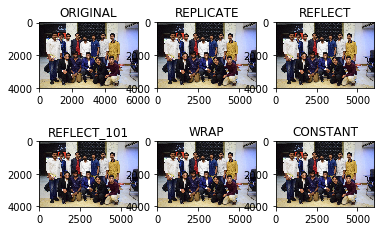

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread('images/image1.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

### Arithmetic Operations on Images

#### Image Addition

You can add two images by OpenCV function, cv2.add() or simply by numpy operation, 

res = img1 + img2. 

Both images should be of same depth and type, or second image can just be a scalar value.

There is a difference between OpenCV addition and Numpy addition. OpenCV addition is a saturated operation while Numpy addition is a modulo operation.

In [9]:
x = np.uint8([250])
len(x)

1

In [11]:
y = np.uint8([10])
print(x+y) # 250+10 = 260 % 256 = 4
print(cv2.add(x,y)) # 250+10 = 260 => 255

[4]
[[255]]


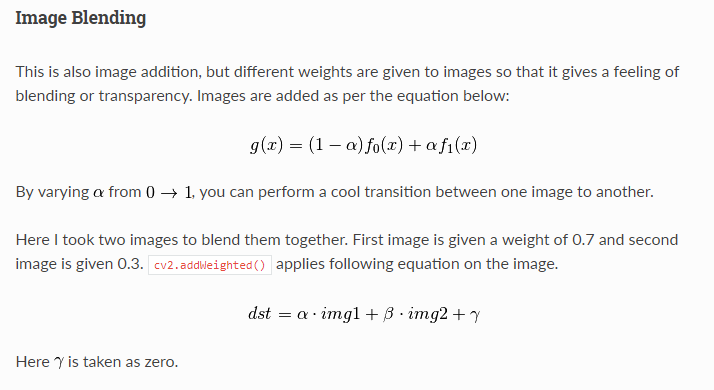

uint8
uint8


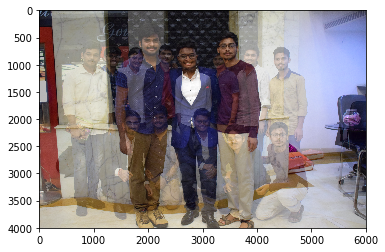

In [35]:
img = cv2.imread('images/image1.jpg')
img1 = cv2.imread('images/image4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

print(img.dtype)
print(img1.dtype)
# cv2.namedWindow('dst', cv2.WINDOW_NORMAL)
dst = cv2.addWeighted(img,0.3,img1,0.7,0)

# cv2.imshow('dst',dst)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(dst)
plt.show()

Bitwise Operations

This includes bitwise AND, OR, NOT and XOR operations. They will be highly useful while extracting any part of the image (as we will see in coming chapters), defining and working with non-rectangular ROI etc. Below we will see an example on how to change a particular region of an image.

I want to put OpenCV logo above an image. If I add two images, it will change color. If I blend it, I get an transparent effect. But I want it to be opaque. If it was a rectangular region, I could use ROI as we did in last chapter. But OpenCV logo is a not a rectangular shape. So you can do it with bitwise operations as below:

Exploring Threshold function:
    
cv2.threshold(src, thresh, maxval, type[, dst]) → retval, dst
Parameters:	
    
    src – input array (single-channel, 8-bit or 32-bit floating point).
    
    dst – output array of the same size and type as src.
    
    thresh – threshold value.
    
    maxval – maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.
    
    type – thresholding type (see the details below).
    
Here, the matter is straight forward. If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is cv2.threshold. First argument is the source image, which should be a grayscale image. Second argument is the threshold value which is used to classify the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value. OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function. Different types are:
    
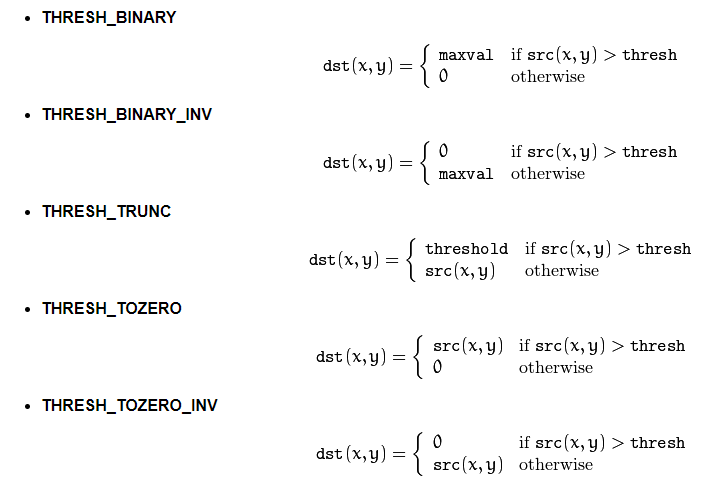

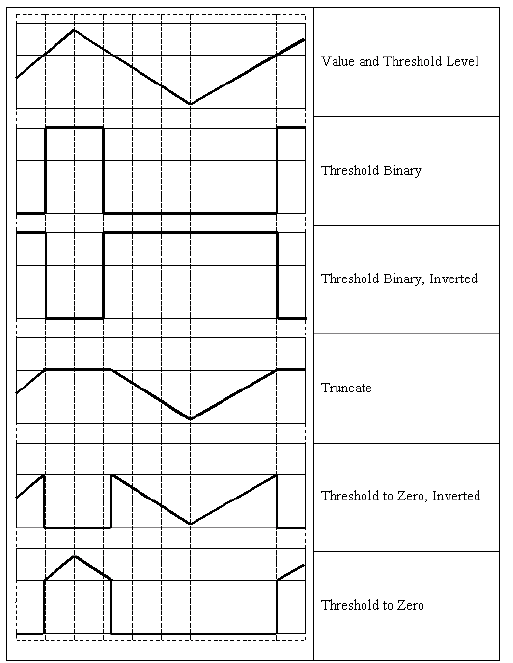

(280, 450)
[[ 42  47  50 ...  55  53  53]
 [ 45  49  53 ...  59  58  58]
 [ 48  54  59 ...  65  64  63]
 ...
 [114 107 102 ... 106 110 110]
 [118 120 111 ... 111 117 117]
 [112 120 109 ... 110 105 105]]


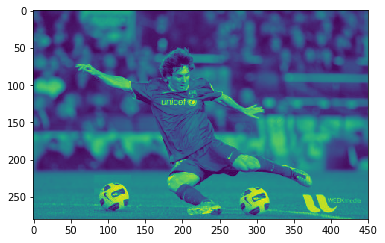

In [48]:
# Load two images
img1 = cv2.imread('images/roi.jpg',0)
print(img1.shape)
print(img1)
plt.imshow(img1)
plt.show()
#see next cell

[  8   9   9 ... 113 113 114]


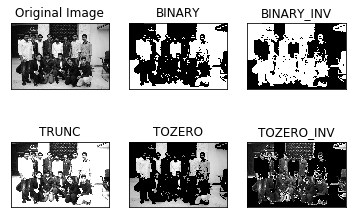

In [9]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/image1.jpg',0)
print(img[200])

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

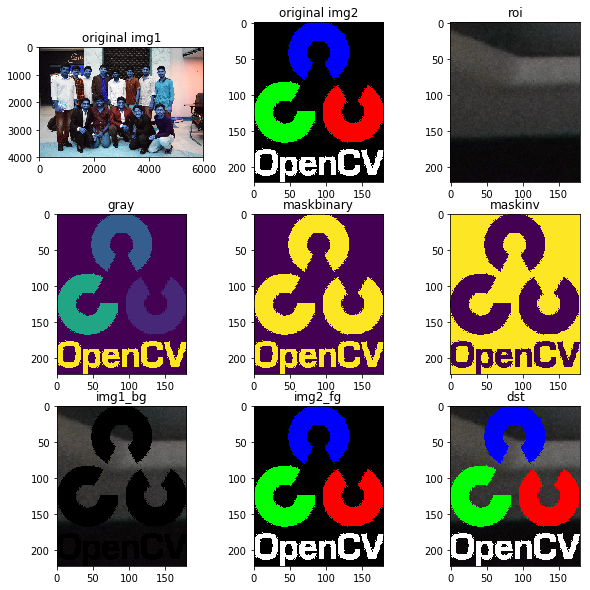

In [63]:

# Load two images
img1 = cv2.imread('images/image1.jpg')
img2 = cv2.imread('images/opencv-logo.png')

fig = plt.figure(figsize=(10, 10))

plt.subplot(3,3,1)
plt.title("original img1")
plt.imshow(img1)

plt.subplot(3,3,2)
plt.title("original img2")
plt.imshow(img2)
#original image

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
plt.subplot(3,3,3)
plt.title("roi")
plt.imshow(roi)

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
plt.subplot(3,3,4)
plt.title("gray")
plt.imshow(img2gray)

ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
plt.subplot(3,3,5)
plt.title("maskbinary")
plt.imshow(mask)

mask_inv = cv2.bitwise_not(mask)
plt.subplot(3,3,6)
plt.title("maskinv")
plt.imshow(mask_inv)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
plt.subplot(3,3,7)
plt.title("img1_bg")
plt.imshow(img1_bg)


# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
plt.subplot(3,3,8)
plt.title("img2_fg")
plt.imshow(img2_fg)



# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
plt.subplot(3,3,9)
plt.title("dst")
plt.imshow(dst)
plt.show() 

cv2.namedWindow('res', cv2.WINDOW_NORMAL)
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

https://stackoverflow.com/questions/32774956/can-anybody-help-me-to-explain-arguments-meaning-in-res-cv2-bitwise-andimg-im

